Lewis Francis C1826277

In [6]:
!pip install odfpy

In [7]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [8]:
import pandas as pd

Change the location of the drive to the location that "adult_cancer_survival_2015_2019_Excel" is located on your google drive

In [9]:
xls = pd.ExcelFile("/gdrive/My Drive/Data Vis/adult_cancer_survival_2015_2019_Excel.xlsx")
df1 = pd.read_excel(xls, 'table_1')
df2 = pd.read_excel(xls, 'table_2')
df3 = pd.read_excel(xls, 'table_3')
df4 = pd.read_excel(xls, 'table_4')

In [10]:
print('\nInformation of the datasets...... \n')
print(df1.info(),df2.info(),df3.info(),df4.info())


Information of the datasets...... 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cancer Site           605 non-null    object 
 1   Gender                605 non-null    object 
 2   Standardisation Type  605 non-null    object 
 3   Age At Diagnosis      605 non-null    object 
 4   Patients              605 non-null    int64  
 5   1-Year Survival (%)   553 non-null    float64
 6   1-Year Lower 95% CI   553 non-null    float64
 7   1-Year Upper 95% CI   553 non-null    float64
 8   2-Year Survival (%)   550 non-null    float64
 9   2-Year Lower 95% CI   550 non-null    float64
 10  2-Year Upper 95% CI   550 non-null    float64
 11  3-Year Survival (%)   547 non-null    float64
 12  3-Year Lower 95% CI   547 non-null    float64
 13  3-Year Upper 95% CI   547 non-null    float64
 14  4-Year Survival (%)   537 non-null   

In [11]:
missing_valuesPercentiledf1 = pd.DataFrame(df1.isnull().sum() * 100 / len(df1))
missing_valuesPercentiledf1 .columns = ["Missing Values"]

missing_valuesPercentiledf1 = missing_valuesPercentiledf1[missing_valuesPercentiledf1 ["Missing Values"] != 0]

missing_valuesPercentiledf1 

,Missing Values
1-Year Survival (%),8.595041
1-Year Lower 95% CI,8.595041
1-Year Upper 95% CI,8.595041
2-Year Survival (%),9.090909
2-Year Lower 95% CI,9.090909
2-Year Upper 95% CI,9.090909
3-Year Survival (%),9.586777
3-Year Lower 95% CI,9.586777
3-Year Upper 95% CI,9.586777
4-Year Survival (%),11.239669


In [12]:
missing_valuesPercentiledf3 = pd.DataFrame(df3.isnull().sum() * 100 / len(df1))
missing_valuesPercentiledf3.columns = ["Missing Values"]

missing_valuesPercentiledf3 = missing_valuesPercentiledf3[missing_valuesPercentiledf3["Missing Values"] != 0]

missing_valuesPercentiledf3

,Missing Values
1-Year IMD 1,0.165289
1-Year IMD 5,0.330579
2-Year All quintiles,0.165289
2-Year IMD 1,0.495868
2-Year IMD 2,0.661157
2-Year IMD 3,0.330579
2-Year IMD 4,0.330579
2-Year IMD 5,0.826446
3-Year All quintiles,0.165289
3-Year IMD 1,1.157025


In [13]:
print("table_1\n",df1.isnull().sum(),"\n","table_2\n",df2.isnull().sum(),"\n","table_3\n",df3.isnull().sum(),"\n","table_4\n",df4.isnull().sum())

table_1
 Cancer Site              0
Gender                   0
Standardisation Type     0
Age At Diagnosis         0
Patients                 0
1-Year Survival (%)     52
1-Year Lower 95% CI     52
1-Year Upper 95% CI     52
2-Year Survival (%)     55
2-Year Lower 95% CI     55
2-Year Upper 95% CI     55
3-Year Survival (%)     58
3-Year Lower 95% CI     58
3-Year Upper 95% CI     58
4-Year Survival (%)     68
4-Year Lower 95% CI     68
4-Year Upper 95% CI     68
5-Year Survival (%)     94
5-Year Lower 95% CI     94
5-Year Upper 95% CI     94
dtype: int64 
 table_2
 Cancer Site           0
Gender                0
1-Year All Stages     0
1-Year Stage 1        2
1-Year Stage 2        4
1-Year Stage 3        1
1-Year Stage 4        7
2-Year All Stages     0
2-Year Stage 1        6
2-Year Stage 2        6
2-Year Stage 3        5
2-Year Stage 4        9
3-Year All Stages     0
3-Year Stage 1       11
3-Year Stage 2        9
3-Year Stage 3        6
3-Year Stage 4       15
4-Year All Stages  

Can't drop rows with missing values as this may cause inaccuracies in the data viualisation which would go against one of the key rules in creating data visualisations. Therefore I will fill these NAN values with the mean as a means to fill them with somewhat relevent data

In [14]:
print("Amount of duplicated data:\n","table_1:",(len(df1[df1.duplicated()])),"table_2:",(len(df2[df2.duplicated()])),"table_3:",(len(df3[df3.duplicated()])),"table_4:",(len(df4[df4.duplicated()])))

Amount of duplicated data:
 table_1: 0 table_2: 0 table_3: 0 table_4: 0


In [15]:
df1["1-Year Survival (%)"] = df1["1-Year Survival (%)"].fillna(df1["1-Year Survival (%)"].mean())
df1["2-Year Survival (%)"] = df1["2-Year Survival (%)"].fillna(df1["2-Year Survival (%)"].mean())
df1["3-Year Survival (%)"] = df1["3-Year Survival (%)"].fillna(df1["3-Year Survival (%)"].mean())
df1["4-Year Survival (%)"] = df1["4-Year Survival (%)"].fillna(df1["4-Year Survival (%)"].mean())
df1["5-Year Survival (%)"] = df1["5-Year Survival (%)"].fillna(df1["5-Year Survival (%)"].mean())

In [16]:
df3["2-Year All quintiles"] = df3["2-Year All quintiles"].fillna(df3["2-Year All quintiles"].mean())
df3["3-Year All quintiles"] = df3["3-Year All quintiles"].fillna(df3["3-Year All quintiles"].mean())
df3["4-Year All quintiles"] = df3["4-Year All quintiles"].fillna(df3["4-Year All quintiles"].mean())
df3["5-Year All quintiles"] = df3["5-Year All quintiles"].fillna(df3["5-Year All quintiles"].mean())

In [17]:
print("Shapes of the datasets: ")
print(df1.shape,df3.shape)

Shapes of the datasets: 
(605, 20) (77, 32)


In [18]:
print("Additional information on df1, 'table_1': ")
df1[["1-Year Survival (%)","2-Year Survival (%)","3-Year Survival (%)","4-Year Survival (%)","5-Year Survival (%)"]].describe()

Additional information on df1, 'table_1': 


,1-Year Survival (%),2-Year Survival (%),3-Year Survival (%),4-Year Survival (%),5-Year Survival (%)
count,605.000000,605.000000,605.000000,605.000000,605.000000
mean,73.326401,64.589091,60.006947,57.155680,55.217221
std,20.442343,24.377517,25.548613,25.621355,24.861479
min,7.400000,2.800000,1.800000,1.300000,2.400000
25%,59.400000,46.500000,41.600000,39.600000,42.500000
50%,77.200000,68.500000,63.900000,59.700000,55.300000
75%,89.600000,82.900000,78.500000,76.100000,72.400000
max,99.800000,99.700000,99.700000,99.600000,99.200000


In [19]:
print("Additional information on df3, 'table_3': ")
df3[["1-Year All quintiles","2-Year All quintiles","3-Year All quintiles","4-Year All quintiles","5-Year All quintiles"]].describe()

Additional information on df3, 'table_3': 


,1-Year All quintiles,2-Year All quintiles,3-Year All quintiles,4-Year All quintiles,5-Year All quintiles
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,70.594805,61.413158,56.603947,53.578947,52.041667
std,20.428057,24.753885,26.046115,26.495115,25.715630
min,26.400000,14.300000,10.200000,8.400000,6.300000
25%,48.900000,35.300000,29.600000,26.000000,24.500000
50%,77.200000,67.400000,63.000000,60.500000,56.700000
75%,84.100000,75.700000,71.300000,68.400000,65.400000
max,98.800000,97.400000,96.100000,95.300000,94.800000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4c80df4d0>,
      dtype=object)

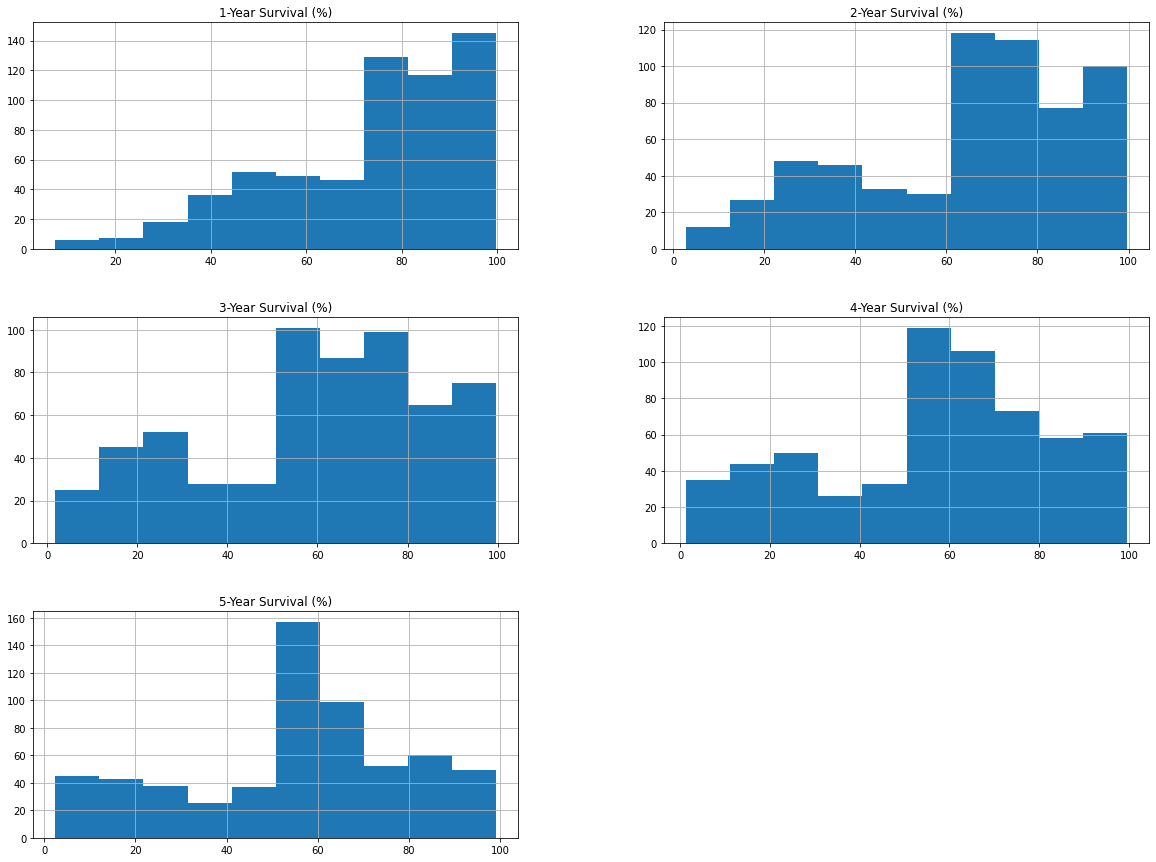

In [20]:
df1[["1-Year Survival (%)","2-Year Survival (%)","3-Year Survival (%)","4-Year Survival (%)","5-Year Survival (%)"]].hist(figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4c826cc10>,
      dtype=object)

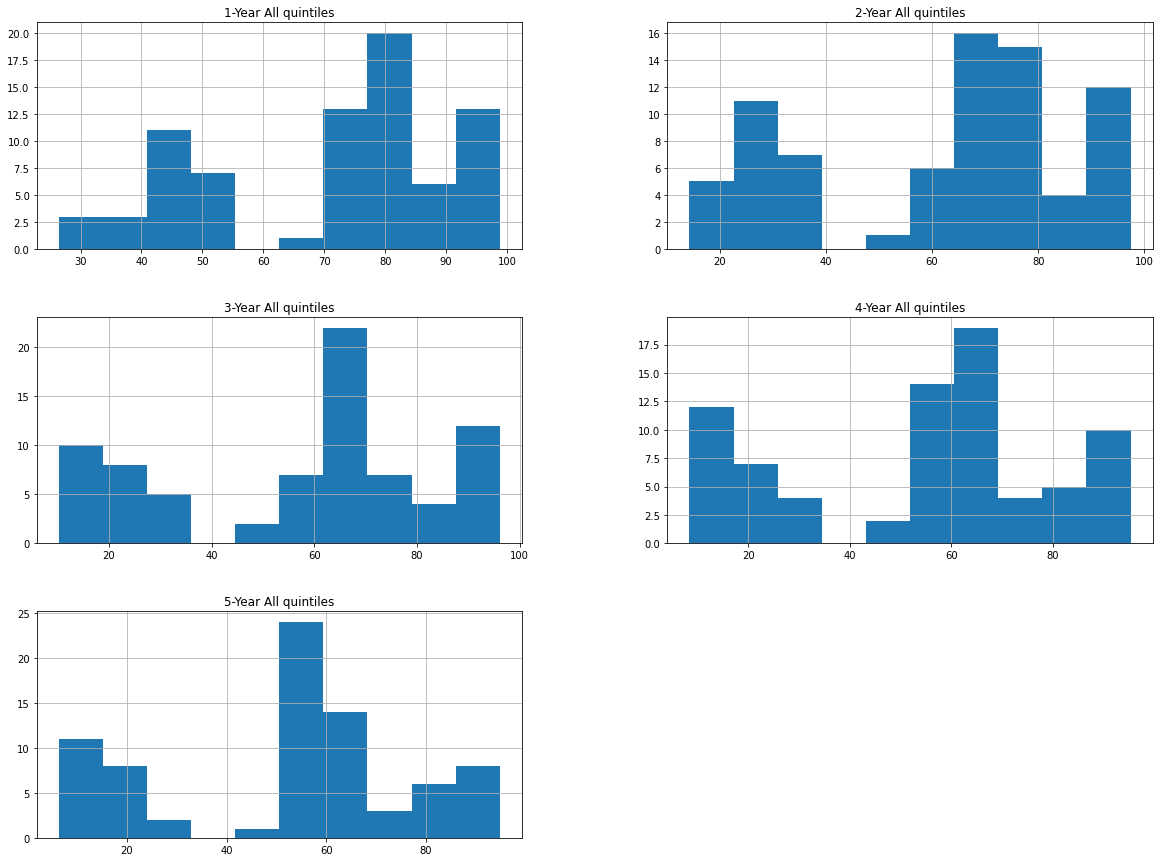

In [21]:
df3[["1-Year All quintiles","2-Year All quintiles","3-Year All quintiles","4-Year All quintiles","5-Year All quintiles"]].hist(figsize=(20,15))

In [22]:
dfBrain = df1[df1['Cancer Site'].str.contains("Brain")]
dfLeukemia = df1[df1['Cancer Site'].str.contains("Leukaemia")]
dfMelanoma = df1[df1['Cancer Site'].str.contains("Melanoma")]
dfLymphoma = df1[df1['Cancer Site'].str.contains("Large cell")]
dfThyroid = df1[df1['Cancer Site'].str.contains("Thyroid")]

In [23]:
dfBrain

,Cancer Site,Gender,Standardisation Type,Age At Diagnosis,Patients,1-Year Survival (%),1-Year Lower 95% CI,1-Year Upper 95% CI,2-Year Survival (%),2-Year Lower 95% CI,2-Year Upper 95% CI,3-Year Survival (%),3-Year Lower 95% CI,3-Year Upper 95% CI,4-Year Survival (%),4-Year Lower 95% CI,4-Year Upper 95% CI,5-Year Survival (%),5-Year Lower 95% CI,5-Year Upper 95% CI
50,Brain,Male,Non - standardised,15 to 44,1984,84.900000,83.3,86.5,75.300000,73.3,77.2,69.400000,67.2,71.6,65.10000,62.7,67.5,61.600000,58.8,64.3
51,Brain,Male,Non - standardised,45 to 54,1639,63.000000,60.6,65.3,37.500000,35.1,40.0,29.100000,26.7,31.5,25.10000,22.6,27.5,22.700000,20.2,25.2
52,Brain,Male,Non - standardised,55 to 64,2485,45.100000,43.1,47.1,22.200000,20.4,23.9,14.100000,12.6,15.6,10.50000,9.1,12.0,8.800000,7.3,10.3
53,Brain,Male,Non - standardised,65 to 74,3271,27.600000,26.1,29.1,10.200000,9.1,11.3,6.500000,5.6,7.5,57.15568,NaN,NaN,55.217221,NaN,NaN
54,Brain,Male,Non - standardised,75 to 99,2823,9.000000,7.9,10.1,2.900000,2.2,3.6,2.100000,1.4,2.7,57.15568,NaN,NaN,55.217221,NaN,NaN
55,Brain,Male,Non - standardised,All ages,12202,40.800000,40.0,41.7,25.100000,24.3,25.9,20.200000,19.4,21.0,17.60000,16.8,18.4,16.000000,15.2,16.8
56,Brain,Male,Age-standardised (5 gps),All ages,12202,41.200000,40.3,42.2,22.000000,21.0,23.0,16.300000,15.4,17.3,57.15568,NaN,NaN,55.217221,NaN,NaN
57,Brain,Male,Non - standardised,65-99,6094,73.326401,NaN,NaN,64.589091,NaN,NaN,60.006947,NaN,NaN,3.20000,2.6,3.7,2.400000,1.8,3.0
58,Brain,Male,Age-standardised (4 gps),All ages,12202,73.326401,NaN,NaN,64.589091,NaN,NaN,60.006947,NaN,NaN,13.50000,12.6,14.5,11.500000,10.5,12.6
59,Brain,Female,Non - standardised,15 to 44,1423,87.300000,85.6,89.0,78.000000,75.8,80.2,72.100000,69.6,74.6,68.00000,65.3,70.8,65.100000,62.0,68.2


In [24]:
dfBrain = dfBrain.drop([57,66,75])
dfLymphoma = dfLymphoma.drop([225,234])
dfThyroid = dfThyroid.drop([569,578,587])

#Download used for Visualisation 
Files are already given in the DAV File so there is not need to run this part

In [ ]:
dfBrain = dfBrain[["Gender","Age At Diagnosis","1-Year Survival (%)","2-Year Survival (%)","3-Year Survival (%)","4-Year Survival (%)","5-Year Survival (%)"]]
dfLeukemia = dfLeukemia[["Gender","Age At Diagnosis","1-Year Survival (%)","2-Year Survival (%)","3-Year Survival (%)","4-Year Survival (%)","5-Year Survival (%)"]]
dfMelanoma = dfMelanoma[["Gender","Age At Diagnosis","1-Year Survival (%)","2-Year Survival (%)","3-Year Survival (%)","4-Year Survival (%)","5-Year Survival (%)"]]
dfLymphoma = dfLymphoma[["Gender","Age At Diagnosis","1-Year Survival (%)","2-Year Survival (%)","3-Year Survival (%)","4-Year Survival (%)","5-Year Survival (%)"]]
dfThyroid = dfThyroid[["Gender","Age At Diagnosis","1-Year Survival (%)","2-Year Survival (%)","3-Year Survival (%)","4-Year Survival (%)","5-Year Survival (%)"]]

In [ ]:
dfBrain = dfBrain[dfBrain["Age At Diagnosis"].str.contains("All ages")==False]
dfLeukemia = dfLeukemia[dfLeukemia["Age At Diagnosis"].str.contains("All ages")==False]
dfMelanoma = dfMelanoma[dfMelanoma["Age At Diagnosis"].str.contains("All ages")==False]
dfLymphoma = dfLymphoma[dfLymphoma["Age At Diagnosis"].str.contains("All ages")==False]
dfThyroid = dfThyroid[dfThyroid["Age At Diagnosis"].str.contains("All ages")==False]


In [ ]:
dfBrainGroup = dfBrain.groupby(["Age At Diagnosis","Gender"]).sum()
dfLeukemiaGroup = dfLeukemia.groupby(["Age At Diagnosis","Gender"]).sum()
dfMelanomaGroup = dfMelanoma.groupby(["Age At Diagnosis","Gender"]).sum()
dfLymphomaGroup = dfLymphoma.groupby(["Age At Diagnosis","Gender"]).sum()
dfThyroidGroup = dfThyroid.groupby(["Age At Diagnosis","Gender"]).sum()

In [ ]:
dfBrainGroup = dfBrainGroup[["1-Year Survival (%)","2-Year Survival (%)","3-Year Survival (%)","4-Year Survival (%)","5-Year Survival (%)"]].reset_index()
dfLeukemiaGroup = dfLeukemiaGroup[["1-Year Survival (%)","2-Year Survival (%)","3-Year Survival (%)","4-Year Survival (%)","5-Year Survival (%)"]].reset_index()
dfMelanomaGroup = dfMelanomaGroup[["1-Year Survival (%)","2-Year Survival (%)","3-Year Survival (%)","4-Year Survival (%)","5-Year Survival (%)"]].reset_index()
dfLymphomaGroup = dfLymphomaGroup[["1-Year Survival (%)","2-Year Survival (%)","3-Year Survival (%)","4-Year Survival (%)","5-Year Survival (%)"]].reset_index()
dfThyroidGroup = dfThyroidGroup[["1-Year Survival (%)","2-Year Survival (%)","3-Year Survival (%)","4-Year Survival (%)","5-Year Survival (%)"]].reset_index()

Files are saved into your drive to then be downloaded for the data visualisation. (I have already provided the files in the DAV folder)

In [ ]:
dfBrainGroup.to_excel(r'/gdrive/My Drive/Data Vis/dfBrainGroup.xlsx', index = False)
dfLeukemiaGroup.to_excel(r'/gdrive/My Drive/Data Vis/LeukemiaGroup.xlsx', index = False)
dfMelanomaGroup.to_excel(r'/gdrive/My Drive/Data Vis/MelanomaGroup.xlsx', index = False)
dfLymphomaGroup.to_excel(r'/gdrive/My Drive/Data Vis/LymphomaGroup.xlsx', index = False)
dfThyroidGroup.to_excel(r'/gdrive/My Drive/Data Vis/ThyroidGroup.xlsx', index = False)
